In [12]:
from __future__ import print_function

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Import MNIST data
import load_data as data

In [15]:
# n different points we want to cluster
# We have 59 points in all 3 categories * 2 people * 10 repetitions (maia_fall only had 9)
train_trials = 59
test_trials = 16
# Tensor length of 80 since that's how many frames we decided on--easily modifiable
NUM_FRAMES = 80
NUM_FEATURES = 36

# Starting off with just one point so that it's easier to follow along with tutorials
# Will switch to more than one point later
# joint_index specifies which of the 36 joints we want, 0 is nose
# Find corresponding values at https://github.com/CMU-Perceptual-Computing-Lab/openpose/blob/master/doc/output.md
joint_index = 0 

# 3D
# Xtr, Ytr = data.train_get_three_dimension(train_trials)
# Xte, Yte = data.test_get_three_dimension(test_trials)



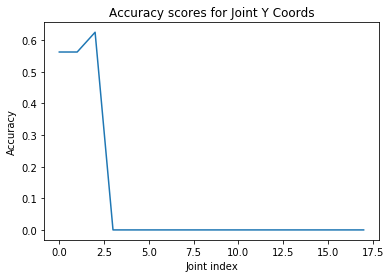

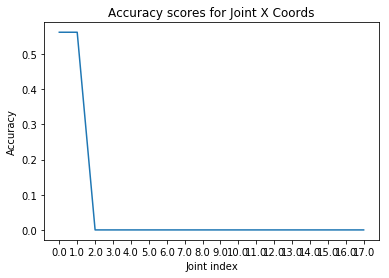

In [22]:
# Start training
accuracies = np.zeros(NUM_FEATURES)
dumb = np.zeros(18)
for i in range(18):
    dumb[i] = i
for i in range(5):
    # 2D
    Xtr, Ytr = data.train_get_one_keypoint(train_trials, i)
    Xte, Yte = data.test_get_one_keypoint(test_trials, i)


    # tf Graph Input

    # 3D
    # xtr = tf.placeholder("float", [train_trials, NUM_FRAMES, NUM_FEATURES])
    # xte = tf.placeholder("float", [NUM_FRAMES, NUM_FEATURES])

    # 2D
    xtr = tf.placeholder("float", [train_trials, NUM_FRAMES])
    xte = tf.placeholder("float", [NUM_FRAMES])

    # Nearest Neighbor calculation using L1 Distance
    # Calculate L1 Distance
    distance = tf.reduce_sum(tf.abs(tf.add(xtr, tf.negative(xte))), reduction_indices=1)
    # Prediction: Get min distance index (Nearest neighbor)
    pred = tf.argmin(distance, 0)

    # Initialize the variables (i.e. assign their default value)
    init = tf.global_variables_initializer()

    ###### Training code

    with tf.Session() as sess:
        accuracy = 0.
        # Run the initializer
        sess.run(init)

        # loop over test data
        for j in range(len(Xte)):
            # Get nearest neighbor
            # 3D
            # nn_index = sess.run(pred, feed_dict={xtr: Xtr, xte: Xte[i, :, :]})

            #2D
            nn_index = sess.run(pred, feed_dict={xtr: Xtr, xte: Xte[j, :]})
            
            # Get nearest neighbor class label and compare it to its true label
#             print("Test", i, "Prediction:", np.argmax(Ytr[nn_index]) + 1, \
#                 "True Class:", np.argmax(Yte[i]) + 1)
            # Calculate accuracy
            if np.argmax(Ytr[nn_index]) == np.argmax(Yte[j]):
                accuracy += 1./len(Xte)
#         print("Done!")
#         print("Accuracy:", accuracy)
        accuracies[i] = accuracy
#         print(accuracies)
        
plt.plot(dumb, accuracies[::2])
plt.show()
plt.ylabel('Accuracy')
plt.xlabel('Joint index')
# plt.xticks(dumb, dumb)
plt.title('Accuracy scores for Joint X Coords')

plt.plot(dumb, accuracies[1::2])
plt.show()
plt.ylabel('Accuracy')
plt.xlabel('Joint index')
# plt.xticks(dumb, dumb)
plt.title('Accuracy scores for Joint Y Coords')